<a href="https://colab.research.google.com/github/dipshii/deep_learninglab/blob/main/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 1:IMPORT LIBRARIES REQUIRED FOR THE PROJECT

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D, Dropout, Flatten , Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

TASK 2: CLONE AND EXPLORE DATASET

In [ ]:
!git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 31.62 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [ ]:
# set the path to the main dir
import os
main_dir="/content/datasets/Data"
# set the path to the train dir
train_dir = os.path.join(main_dir,'train')
# seth the path to the test dir
test_dir = os.path.join(main_dir,'test')
#directory with the training covid images
train_covid_dir = os.path.join(train_dir,'COVID19')
#directory with the training normal images
train_normal_dir = os.path.join(train_dir,'NORMAL')

#directory with the TEST COVID IMAGES
test_covid_dir=os.path.join(test_dir,'COVID19')

#directory with the TEST normal images
test_normal_dir=os.path.join(test_dir,'NORMAL')



In [ ]:
# PRINT THE FILENAMES
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID19(336).jpg', 'COVID19(179).jpg', 'COVID19(95).jpg', 'COVID19(381).jpg', 'COVID-19 (295).jpg', 'COVID19(520).jpg', 'COVID-19 (11).jpeg', 'COVID19(154).jpg', 'COVID19(405).jpg', 'COVID19(528).jpg']
['NORMAL(801).jpg', 'NORMAL(53).jpg', 'NORMAL(272).jpg', 'NORMAL(1079).jpg', 'NORMAL(358).jpg', 'NORMAL(1495).jpg', 'NORMAL(505).jpg', 'NORMAL(786).jpg', 'NORMAL(452).jpg', 'NORMAL(1082).jpg']
['COVID19(408).jpg', 'COVID-19 (570).jpg', 'COVID-19 (864).jpg', 'COVID-19 (461).jpg', 'COVID19(410).jpg', 'COVID-19 (475).jpg', 'COVID-19 (767).jpg', 'COVID19(358).jpg', 'COVID19(129).jpg', 'COVID19(483).jpg']
['NORMAL(760).jpg', 'NORMAL(291).jpg', 'NORMAL(8).jpg', 'NORMAL(181).jpg', 'NORMAL(1396).jpg', 'NORMAL(1037).jpg', 'NORMAL(1386).jpg', 'NORMAL(140).jpg', 'NORMAL(1569).jpg', 'NORMAL(142).jpg']


In [ ]:
#print the total no of images present in each dir
print("Total iamges present in the training set :",len(train_covid_names+train_normal_names))
print("Total images present in the testing set:",len(test_covid_names+test_normal_names))

Total iamges present in the training set : 1811
Total images present in the testing set: 484


task 3 :data visualization

['/content/datasets/Data/train/COVID19/COVID19(336).jpg', '/content/datasets/Data/train/COVID19/COVID19(179).jpg', '/content/datasets/Data/train/COVID19/COVID19(95).jpg', '/content/datasets/Data/train/COVID19/COVID19(381).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (295).jpg', '/content/datasets/Data/train/COVID19/COVID19(520).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (11).jpeg', '/content/datasets/Data/train/COVID19/COVID19(154).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(801).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(53).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(272).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1079).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(358).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1495).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(505).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(786).jpg']


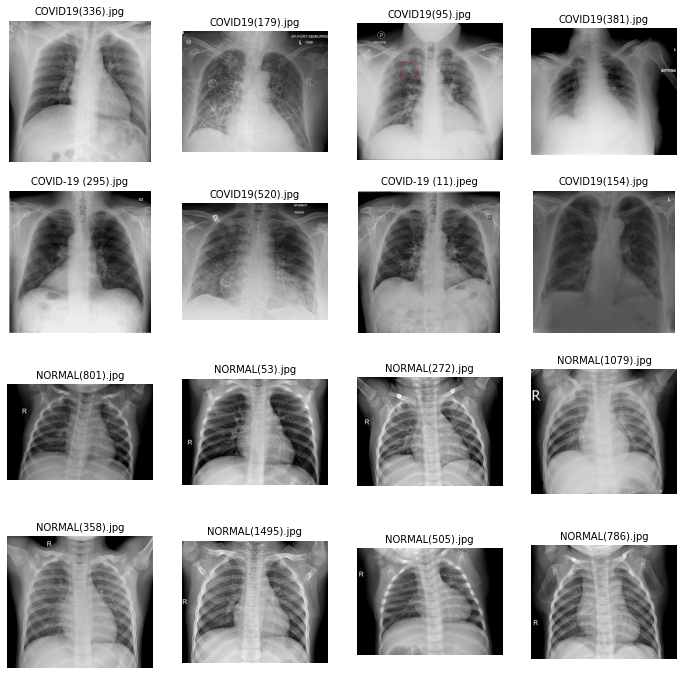

In [ ]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of normal)
import matplotlib.image as mpimg
#set the number of columns and rows
rows=4
cols=4
#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)
#get the filenames from the covid and dir of the train datset
covid_pic=[os.path.join(train_covid_dir,filename)for filename in train_covid_names[0:8]]
normal_pic=[os.path.join(train_normal_dir,filename)for filename in train_normal_names[0:8]]


#print the list
print(covid_pic)
print(normal_pic)

#merge the covid and normal list
merged_list = covid_pic+normal_pic
for i , img_path in enumerate(merged_list):
  data = img_path.split('/',6)[6]
  sp = plt.subplot(rows,cols,i+1)
  sp.axis('off')
  img=mpimg.imread(img_path)
  sp.set_title(data,fontsize=10)
  plt.imshow(img,cmap='gray')
plt.show()  


In [ ]:
dgen_train = ImageDataGenerator(rescale=1./255,
                                validation_split=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
dgen_validation = ImageDataGenerator(rescale= 1./255)
dgen_test = ImageDataGenerator(rescale = 1./255)

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode= 'binary')

validation_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                 subset= 'validation',
                                                 batch_size = 32,
                                                 class_mode= 'binary')
test_generator = dgen_test.flow_from_directory(test_dir,
                                                 target_size=(150,150),
                                                 batch_size = 32,
                                                 class_mode= 'binary')


Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
#get the image shape
train_generator.image_shape

(150, 150, 3)